In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_smartphones.csv')

In [3]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


In [4]:
df.shape

(1020, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  1020 non-null   object 
 1   processor_name         967 non-null    object 
 2   processor_cores        980 non-null    float64
 3   processor_speed        931 non-null    object 
 4   os                     741 non-null    object 
 5   ram                    993 non-null    object 
 6   storage                993 non-null    object 
 7   battery_capacity       987 non-null    object 
 8   battery_power          769 non-null    object 
 9   DualSim                1020 non-null   int64  
 10  Volte                  1020 non-null   int64  
 11  is_5G                  1020 non-null   int64  
 12  is_Vo5G                1020 non-null   int64  
 13  wifi                   1020 non-null   int64  
 14  ngc                    1020 non-null   int64  
 15  irbl

In [6]:
# remove duplicates 
df.duplicated().sum()

2

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(1018, 23)

In [9]:
(df.isnull().sum()/1018)*100

brand                     0.000000
processor_name            5.206287
processor_cores           3.929273
processor_speed           8.742633
os                       27.308448
ram                       2.652259
storage                   2.652259
battery_capacity          3.241650
battery_power            24.656189
DualSim                   0.000000
Volte                     0.000000
is_5G                     0.000000
is_Vo5G                   0.000000
wifi                      0.000000
ngc                       0.000000
irblaster                 0.000000
display_size              3.241650
display_resolution        3.241650
rear_camera               6.483301
front_camera              7.563851
memory_card_supported    27.308448
rating                   13.850688
price                     0.000000
dtype: float64

In [10]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


### Target column (Price) :

<Axes: xlabel='price'>

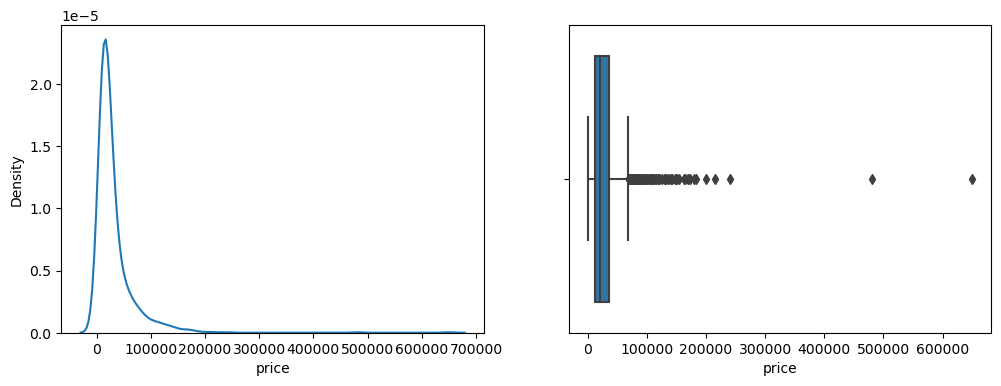

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.kdeplot(x=df['price'])

plt.subplot(122)
sns.boxplot(x=df['price'])

In [12]:
df[(df['price']>200000) & (df['price']<300000)].shape

(2, 23)

##### Price Observation
1. Price > 7,00,000 --- 0
2. Price > 6,00,000 --- 1(vertu)
3. Price > 5,00,000 --- 0
4. Price > 4,00,000 --- 1(xiaomi)
5. Price > 3,00,000 --- 0
6. Price > 2,00,000 --- 2(huawei)
7. Price > 1,50,000 --- 9
8. Price > 1,00,000 --- 35

In [13]:
# remove outliers (whose 'Price' > 2,00,000)
df = df.drop(df[df['price']>200000].index,axis=0)

In [14]:
df.shape

(1014, 23)

### 1. Brand :

In [15]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


In [16]:
len(df['brand'].unique())

52

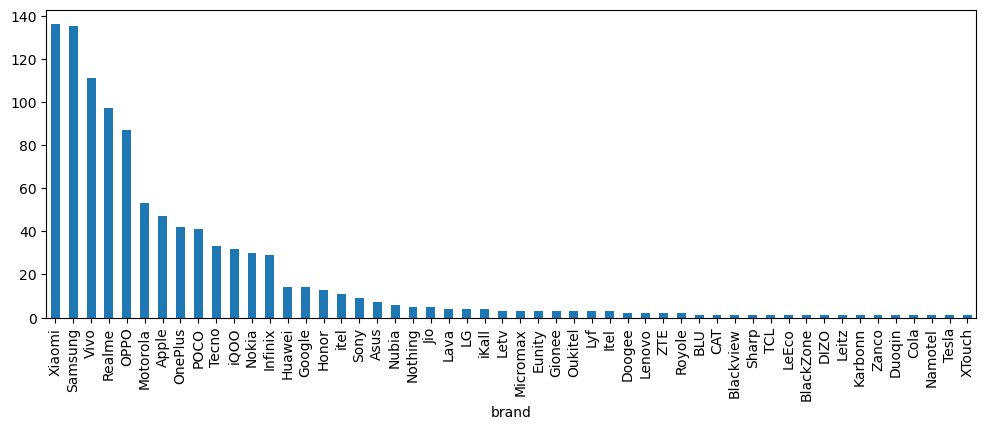

In [17]:
plt.figure(figsize=(12,4))
df['brand'].value_counts().plot(kind='bar')
plt.show()

In [18]:
# 'OTHERS' category for smartphone 
main=['Xiaomi', 'Samsung', 'Vivo', 'Realme', 'OPPO', 'Motorola', 'Apple',
       'OnePlus', 'POCO', 'Tecno', 'iQOO', 'Nokia', 'Infinix','Huawei']
df['brand'] = df['brand'].apply(lambda x:x if x in main else 'Others')

In [19]:
df['brand'].unique()

array(['OnePlus', 'Samsung', 'Motorola', 'Realme', 'Apple', 'Xiaomi',
       'Others', 'OPPO', 'Vivo', 'POCO', 'iQOO', 'Tecno', 'Infinix',
       'Nokia', 'Huawei'], dtype=object)

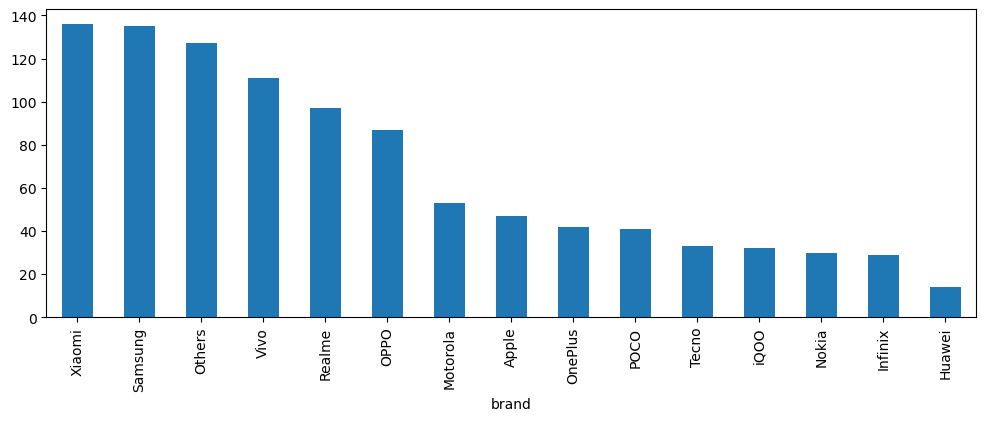

In [20]:
plt.figure(figsize=(12,4))
df['brand'].value_counts().plot(kind='bar')
plt.show()

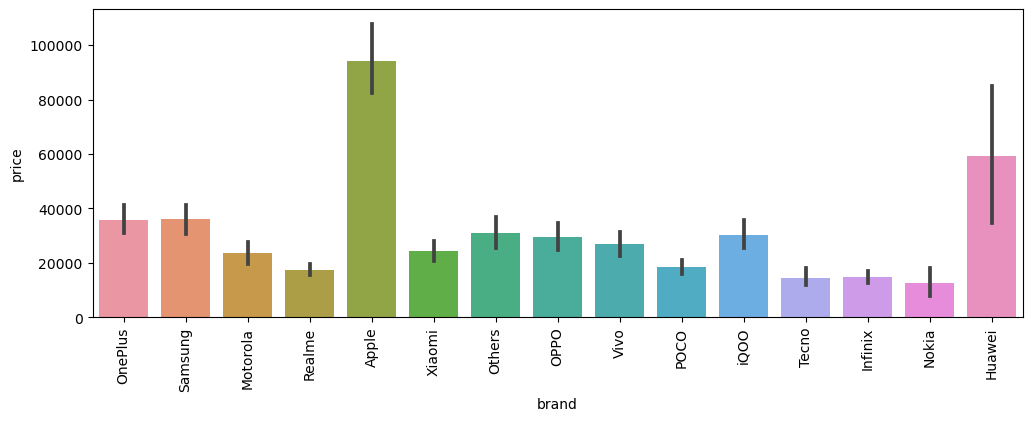

In [21]:
# 'price' and 'brand'
plt.figure(figsize=(12,4))
sns.barplot(x=df.brand, y=df.price)
plt.xticks(rotation='vertical')
plt.show()

### 2. Processor :

In [22]:
# missing values of processor columns
print(df['processor_name'].isnull().sum())
print(df['processor_cores'].isnull().sum())
print(df['processor_speed'].isnull().sum())

53
40
89


#### A. processor_name

processor_name
Snapdragon    414
Helio         202
Dimensity     175
Exynos         50
Bionic         45
Unisoc         35
Tiger          24
Google          9
Kirin           6
Fusion          1
Name: count, dtype: int64


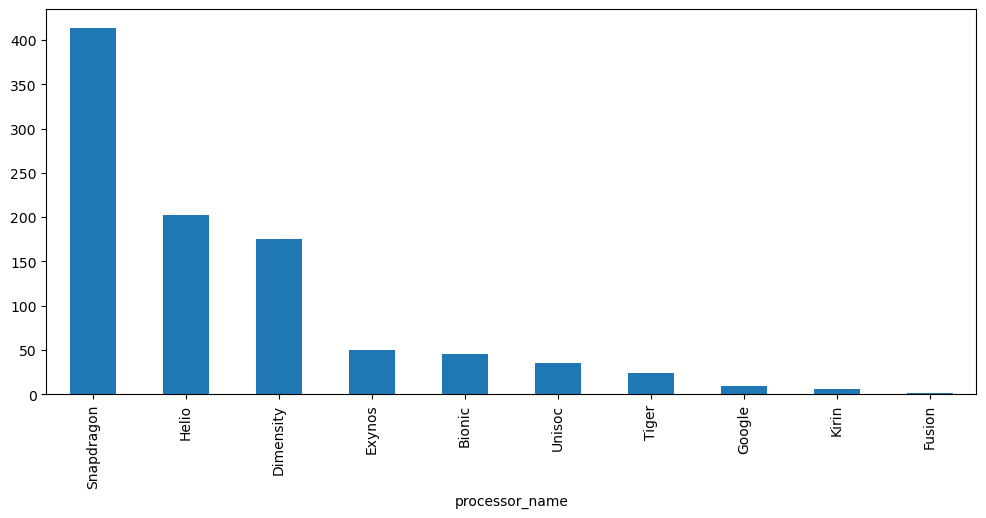

In [23]:
plt.figure(figsize=(12,5))
print(df['processor_name'].value_counts())
df['processor_name'].value_counts().plot(kind='bar')
plt.show()

In [24]:
# since 'Apple' brand have 'Bionic' processors
df['processor_name'] = df['processor_name'].str.replace('Fusion','Bionic')

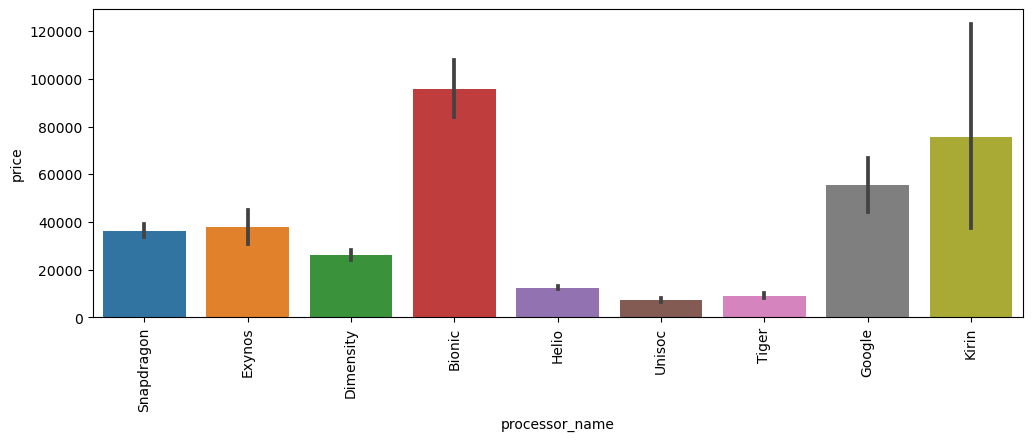

In [25]:
# price and processor_name
plt.figure(figsize=(12,4))
sns.barplot(x=df.processor_name, y=df.price)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
# brands have missing processor_names
df[df['processor_name'].isnull()==True]['brand'].unique()

array(['Others', 'Samsung', 'Nokia', 'Motorola', 'Apple', 'Tecno',
       'Huawei'], dtype=object)

In [27]:
df.groupby(by=['brand','processor_name']).size().reset_index()

,brand,processor_name,0
0,Apple,Bionic,46
1,Huawei,Kirin,6
2,Huawei,Snapdragon,7
3,Infinix,Dimensity,6
4,Infinix,Helio,20
5,Infinix,Tiger,3
6,Motorola,Dimensity,2
7,Motorola,Helio,11
8,Motorola,Snapdragon,37
9,Motorola,Tiger,2


##### Processor_name Observation

1. Apple ---- 'Bionic'
2. Samsung ---- 'Exynos'
3. Nokia ---- 'Snapdragon'
4. Motorola ---- 'Snapdragon'
5. Tecno ---- 'Helio'
6. Huawei ---- 'Kirin'

In [28]:
# processor_name missing values Imputation
df['processor_name'] = df['processor_name'].fillna('None')

In [29]:
import warnings
warnings.filterwarnings('ignore')
for i,word in enumerate(df['processor_name']):
    if word=='None':
        if df['brand'].iloc[i]=='Apple':
            df['processor_name'].iloc[i]='Bionic'
        elif df['brand'].iloc[i]=='Samsung':
            df['processor_name'].iloc[i]='Exynos'
        elif df['brand'].iloc[i] in ['Nokia', 'Motorola','Others']:
            df['processor_name'].iloc[i]='Snapdragon'
        elif df['brand'].iloc[i]=='Tecno':
            df['processor_name'].iloc[i]='Helio'
        elif df['brand'].iloc[i]=='Huawei':
            df['processor_name'].iloc[i]='Kirin'

processor_name
Snapdragon    449
Helio         203
Dimensity     175
Exynos         65
Bionic         47
Unisoc         35
Tiger          24
Google          9
Kirin           7
Name: count, dtype: int64


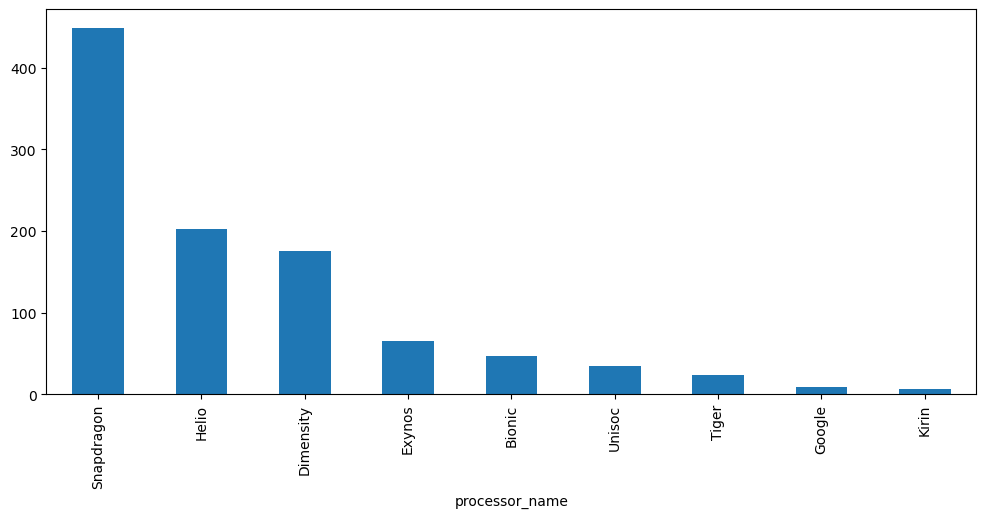

In [30]:
plt.figure(figsize=(12,5))
print(df['processor_name'].value_counts())
df['processor_name'].value_counts().plot(kind='bar')
plt.show()

In [31]:
df.groupby(by=['brand','processor_name']).size().reset_index()[0].sum()

1014

#### B. processor_cores

processor_cores
8.0    893
6.0     39
4.0     39
2.0      2
1.0      1
Name: count, dtype: int64


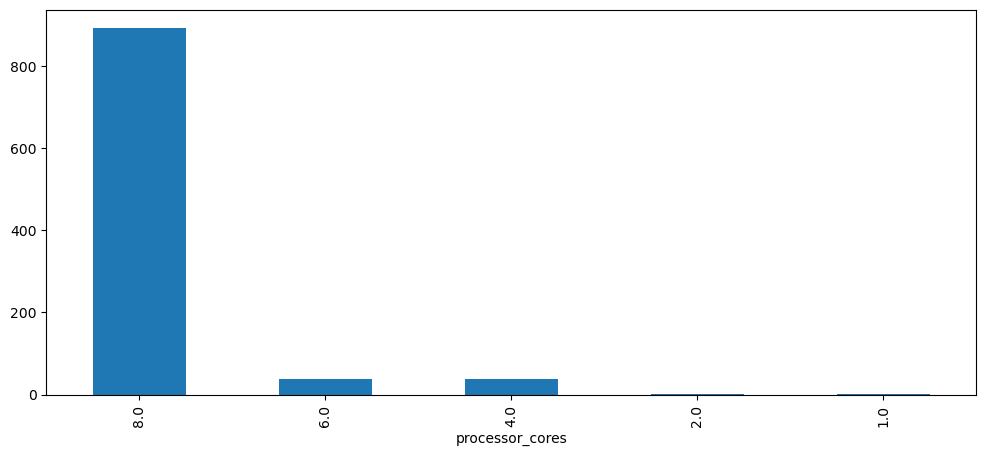

In [32]:
plt.figure(figsize=(12,5))
print(df['processor_cores'].value_counts())
df['processor_cores'].value_counts().plot(kind='bar')
plt.show()

In [33]:
df[df['processor_cores']==6.0]['brand'].unique()

array(['Apple'], dtype=object)

In [34]:
# brands whose processor_cores are missing
df[df['processor_cores'].isnull()==True]['brand'].value_counts()

brand
Nokia       15
Others      14
Apple        6
Samsung      3
Motorola     1
Xiaomi       1
Name: count, dtype: int64

In [35]:
# processor_cores missing values imputation
df['processor_cores'] = df['processor_cores'].fillna(8.0)

#### C. processor_speed:

In [36]:
df['processor_speed'].info()

<class 'pandas.core.series.Series'>
Index: 1014 entries, 0 to 1019
Series name: processor_speed
Non-Null Count  Dtype 
--------------  ----- 
925 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


In [37]:
df['processor_speed'] = df['processor_speed'].str.replace('\u2009','')

In [38]:
# finding the mean by which we can fill the null values of 'processor_speed'
mean_processor_speed = round(df[df['processor_speed'].isnull()==False]['processor_speed'].str.replace(' ','').astype(np.float64).mean(),1)

# filling null values of processor_speed
df['processor_speed'] = df['processor_speed'].fillna(mean_processor_speed).astype(np.float64)

In [39]:
# missing values of processor columns NOW
print(df['processor_name'].isnull().sum())
print(df['processor_cores'].isnull().sum())
print(df['processor_speed'].isnull().sum())

0
0
0


In [40]:
df.columns

Index(['brand', 'processor_name', 'processor_cores', 'processor_speed', 'os',
       'ram', 'storage', 'battery_capacity', 'battery_power', 'DualSim',
       'Volte', 'is_5G', 'is_Vo5G', 'wifi', 'ngc', 'irblaster', 'display_size',
       'display_resolution', 'rear_camera', 'front_camera',
       'memory_card_supported', 'rating', 'price'],
      dtype='object')

### 3.  OS :

In [41]:
df['os'].isnull().sum()

278

In [42]:
df['os'].value_counts()

os
Android v12                   287
Android v11                   232
Android v10                    57
Android v13                    45
Android v9.0 (Pie)             26
Android v10.0                  22
iOS v16                        14
iOS v15                        10
Android v8.1 (Oreo)            10
Android v11.0                   4
Android v8.0 (Oreo)             4
Android v6.0 (Marshmallow)      3
iOS v15.0                       3
iOS v13                         3
EMUI v12                        2
Harmony v2.0                    2
Android v5.1.1 (Lollipop)       2
Android v7.1 (Nougat)           1
HarmonyOS v2.0                  1
Hongmeng OS v4.0                1
iOS v17                         1
Android v5.1 (Lollipop)         1
iOS v12.3                       1
Android v12.1                   1
iOS v13.0                       1
HarmonyOS v2                    1
Android v9 (Pie)                1
Name: count, dtype: int64

In [43]:
# 'OS' ---> 'os_name' and 'os_version'
df['os'] = df['os'].str.split(' v',expand=True)[0]

In [44]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


In [45]:
df[df['os'].isnull()==True]['brand'].value_counts()

brand
Others      66
Xiaomi      34
OnePlus     23
OPPO        21
Samsung     19
Motorola    17
Nokia       17
Vivo        16
iQOO        16
Realme      16
Apple       14
Tecno        9
POCO         6
Huawei       4
Name: count, dtype: int64

In [46]:
# filling null values of 'os' column
df['os'] = np.where((df['os'].isnull()==True) & (df['brand']=='Apple'),'iOS',df['os'])
df['os'] = np.where((df['os'].isnull()==True) & (df['brand']=='Huawei'),'HarmonyOS',df['os'])

In [47]:
df['os'] = df['os'].fillna('Android')

In [48]:
# assign 'OTHERS' category for other OS
main=['Android','iOS']
df['os'] = df['os'].apply(lambda x:x if x in main else 'Others')

In [49]:
df['os'].isnull().sum()

0

os
Android    956
iOS         47
Others      11
Name: count, dtype: int64


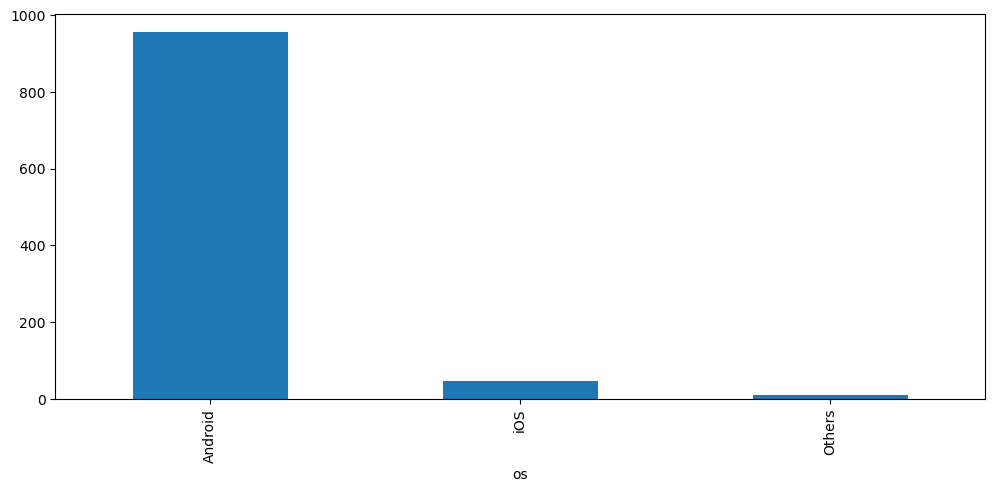

In [50]:
plt.figure(figsize=(12,5))
print(df['os'].value_counts())
df['os'].value_counts().plot(kind='bar')
plt.show()

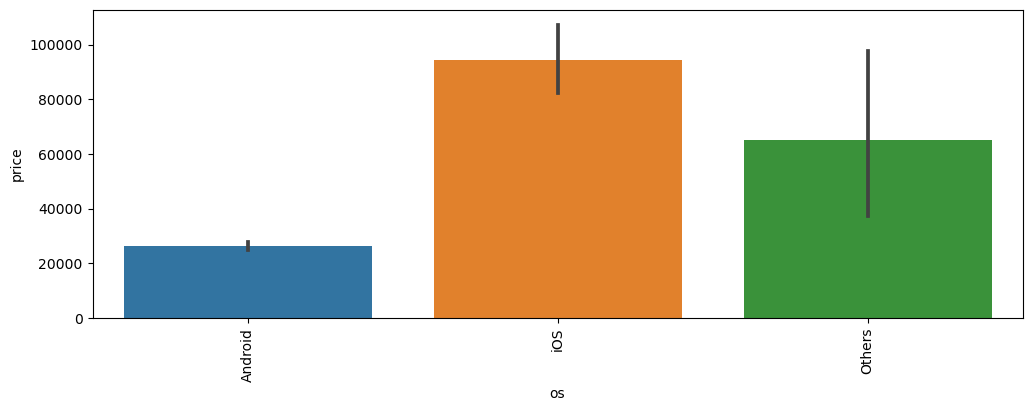

In [51]:
# price and os 
plt.figure(figsize=(12,4))
sns.barplot(x=df.os, y=df.price)
plt.xticks(rotation='vertical')
plt.show()

### 4. Ram and Storage :

In [52]:
(df.isnull().sum()/df.shape[0])*100

brand                     0.000000
processor_name            0.000000
processor_cores           0.000000
processor_speed           0.000000
os                        0.000000
ram                       2.564103
storage                   2.564103
battery_capacity          3.254438
battery_power            24.556213
DualSim                   0.000000
Volte                     0.000000
is_5G                     0.000000
is_Vo5G                   0.000000
wifi                      0.000000
ngc                       0.000000
irblaster                 0.000000
display_size              3.254438
display_resolution        3.254438
rear_camera               6.508876
front_camera              7.593688
memory_card_supported    27.416174
rating                   13.806706
price                     0.000000
dtype: float64

In [53]:
df['ram'] = df['ram'].str.replace('\u2009',' ')
df['storage'] = df['storage'].str.replace('\u2009',' ')

In [54]:
## 'ram' ---> 'is_ram_gb' and 'ram'
df['is_ram_gb'] = df['ram'].str.split(expand=True)[1]
df['ram'] = df['ram'].str.split(expand=True)[0]

In [55]:
## 'storage' ---> 'is_storage_gb' and 'storage'
df['is_storage_gb'] = df['storage'].str.split(expand=True)[1]
df['storage'] = df['storage'].str.split(expand=True)[0]

##### Ram and Storage observation :

if Price <= 6,000 then ram,storage are in MBs else both are in GBs

In [56]:
# filling missing values 
print(df[(df['is_ram_gb']=='GB') & (df['ram'].isnull()==False)]['ram'].mode()[0])              # mode_gb_ram
print(df[(df['is_ram_gb']=='MB') & (df['ram'].isnull()==False)]['ram'].mode()[0])              # mode_mb_ram
print(df[(df['is_storage_gb']=='GB') & (df['storage'].isnull()==False)]['storage'].mode()[0])  # mode_gb_storage
print(df[(df['is_storage_gb']=='MB') & (df['storage'].isnull()==False)]['storage'].mode()[0])  # mode_mb_storage

8
512
128
128


In [57]:
df['ram'] = np.where((df['ram'].isnull()==True) & (df['price']>6000),'8',df['ram'])
df['ram'] = np.where((df['ram'].isnull()==True) & (df['price']<6000),'512',df['ram'])
df['is_ram_gb'] = np.where((df['is_ram_gb'].isnull()==True) & (df['price']>6000),'GB',df['is_ram_gb'])
df['is_ram_gb'] = np.where((df['is_ram_gb'].isnull()==True) & (df['price']<6000),'MB',df['is_ram_gb'])

df['storage'] = df['storage'].fillna('128')
df['is_storage_gb'] = np.where((df['is_storage_gb'].isnull()==True) & (df['price']>6000),'GB',df['is_storage_gb'])
df['is_storage_gb'] = np.where((df['is_storage_gb'].isnull()==True) & (df['price']<6000),'MB',df['is_storage_gb'])

In [58]:
df['ram'] = df['ram'].astype(np.int64)
df['storage'] = df['storage'].astype(np.int64)

In [59]:
df['is_ram_gb'] = df['is_ram_gb'].map({'GB':1,'MB':0})
df['is_storage_gb'] = df['is_storage_gb'].map({'GB':1,'MB':0})

In [60]:
df.isnull().sum()

brand                      0
processor_name             0
processor_cores            0
processor_speed            0
os                         0
ram                        0
storage                    0
battery_capacity          33
battery_power            249
DualSim                    0
Volte                      0
is_5G                      0
is_Vo5G                    0
wifi                       0
ngc                        0
irblaster                  0
display_size              33
display_resolution        33
rear_camera               66
front_camera              77
memory_card_supported    278
rating                   140
price                      0
is_ram_gb                  0
is_storage_gb              5
dtype: int64

### 5. Battery :

In [61]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price,is_ram_gb,is_storage_gb
0,OnePlus,Snapdragon,8.0,3.2,Android,12,256,5000 mAh,100W,1,...,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999,1,1.0
1,OnePlus,Snapdragon,8.0,2.2,Android,6,128,5000 mAh,33W,1,...,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989,1,1.0
2,Samsung,Exynos,8.0,2.4,Android,4,64,5000 mAh,15W,1,...,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499,1,1.0
3,Motorola,Snapdragon,8.0,2.2,Android,6,128,5000 mAh,NaN,1,...,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999,1,1.0
4,Realme,Dimensity,8.0,2.6,Android,6,128,5000 mAh,67W,1,...,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999,1,1.0


In [62]:
df['battery_capacity'] = df['battery_capacity'].str.replace('\u2009mAh ','')
df['battery_power'] = df['battery_power'].str.replace('W','')

In [63]:
# null values in 'battery column'
print(df['battery_capacity'].isnull().sum())
print(df['battery_power'].isnull().sum())

33
249


In [64]:
# filling null values of 'battery_capacity' column ---> mean()
mean = round(df['battery_capacity'].fillna(0).astype(np.int64).mean(),0)
df['battery_capacity'] = df['battery_capacity'].fillna(mean).astype(np.int64)

In [65]:
# since the precentage of null values is very high, it's not efficient for imputation
df = df.drop(['battery_power'],axis=1)

In [66]:
df.shape

(1014, 24)

### 6. Features :

In [67]:
df.columns

Index(['brand', 'processor_name', 'processor_cores', 'processor_speed', 'os',
       'ram', 'storage', 'battery_capacity', 'DualSim', 'Volte', 'is_5G',
       'is_Vo5G', 'wifi', 'ngc', 'irblaster', 'display_size',
       'display_resolution', 'rear_camera', 'front_camera',
       'memory_card_supported', 'rating', 'price', 'is_ram_gb',
       'is_storage_gb'],
      dtype='object')

In [68]:
df.isnull().sum()

brand                      0
processor_name             0
processor_cores            0
processor_speed            0
os                         0
ram                        0
storage                    0
battery_capacity           0
DualSim                    0
Volte                      0
is_5G                      0
is_Vo5G                    0
wifi                       0
ngc                        0
irblaster                  0
display_size              33
display_resolution        33
rear_camera               66
front_camera              77
memory_card_supported    278
rating                   140
price                      0
is_ram_gb                  0
is_storage_gb              5
dtype: int64

### 7. Display :

In [69]:
# filling missing values of 'display_size'
mean_display_size = round(df['display_size'].describe()[1],2)
df['display_size'] = df['display_size'].fillna(mean_display_size)

In [70]:
# 'display_resolution' ---> 'display_width' and 'display_height'
df['display_width'] = df['display_resolution'].str.replace(' ','').str.split('x',expand=True)[0]
df['display_height'] = df['display_resolution'].str.replace(' ','').str.split('x',expand=True)[1]

In [71]:
# filling missing values of 'display_width' and 'display_height'

df['display_width'] = df['display_width'].fillna('0').astype(np.int64)
df['display_height'] = df['display_height'].fillna('0').astype(np.int64)

mean_display_width = round(df['display_width'].mean(),0)
mean_display_height = round(df['display_height'].mean(),0)

df['display_width'] = np.where(df['display_width']==0,mean_display_width,df['display_width'])
df['display_height'] = np.where(df['display_height']==0,mean_display_height,df['display_height'])

In [72]:
df = df.drop(['display_resolution'],axis=1)

In [73]:
df.isnull().sum()

brand                      0
processor_name             0
processor_cores            0
processor_speed            0
os                         0
ram                        0
storage                    0
battery_capacity           0
DualSim                    0
Volte                      0
is_5G                      0
is_Vo5G                    0
wifi                       0
ngc                        0
irblaster                  0
display_size               0
rear_camera               66
front_camera              77
memory_card_supported    278
rating                   140
price                      0
is_ram_gb                  0
is_storage_gb              5
display_width              0
display_height             0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014 entries, 0 to 1019
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  1014 non-null   object 
 1   processor_name         1014 non-null   object 
 2   processor_cores        1014 non-null   float64
 3   processor_speed        1014 non-null   float64
 4   os                     1014 non-null   object 
 5   ram                    1014 non-null   int64  
 6   storage                1014 non-null   int64  
 7   battery_capacity       1014 non-null   int64  
 8   DualSim                1014 non-null   int64  
 9   Volte                  1014 non-null   int64  
 10  is_5G                  1014 non-null   int64  
 11  is_Vo5G                1014 non-null   int64  
 12  wifi                   1014 non-null   int64  
 13  ngc                    1014 non-null   int64  
 14  irblaster              1014 non-null   int64  
 15  display_s

### 8. Camera :

In [75]:
# filling null values ---> 'camera' column
df['rear_camera'] = df['rear_camera'].fillna(round(df['rear_camera'].describe()[1],0))
df['front_camera'] = df['front_camera'].fillna(round(df['front_camera'].describe()[1],0))

In [76]:
df.isnull().sum()

brand                      0
processor_name             0
processor_cores            0
processor_speed            0
os                         0
ram                        0
storage                    0
battery_capacity           0
DualSim                    0
Volte                      0
is_5G                      0
is_Vo5G                    0
wifi                       0
ngc                        0
irblaster                  0
display_size               0
rear_camera                0
front_camera               0
memory_card_supported    278
rating                   140
price                      0
is_ram_gb                  0
is_storage_gb              5
display_width              0
display_height             0
dtype: int64

### 9. Memory Card :

In [77]:
print(df[df['memory_card_supported']==1]['brand'].value_counts())
print(df[df['memory_card_supported']==0]['brand'].value_counts())

brand
Samsung     107
Xiaomi       89
Vivo         78
Realme       73
OPPO         60
Others       57
Motorola     32
Infinix      29
POCO         28
Tecno        24
Nokia        18
OnePlus      13
iQOO         10
Huawei        9
Name: count, dtype: int64
brand
Apple       33
Vivo        13
Xiaomi      11
Others      10
Realme       8
Samsung      7
POCO         7
OnePlus      6
iQOO         6
Motorola     4
OPPO         3
Huawei       1
Name: count, dtype: int64


In [78]:
df[df['memory_card_supported'].isnull()==True]['brand'].value_counts()

brand
Others      60
Xiaomi      36
OPPO        24
OnePlus     23
Samsung     21
Vivo        20
Motorola    17
iQOO        16
Realme      16
Apple       14
Nokia       12
Tecno        9
POCO         6
Huawei       4
Name: count, dtype: int64

<Axes: xlabel='memory_card_supported', ylabel='price'>

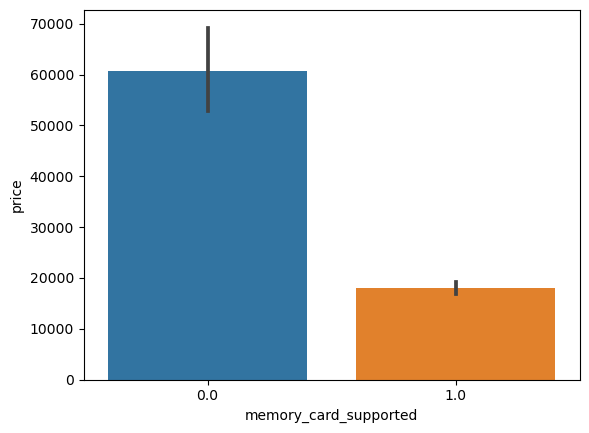

In [79]:
sns.barplot(x=df['memory_card_supported'],y=df['price'])

In [80]:
# since the precentage of null values is very high, it's not efficient for imputation
df = df.drop(['memory_card_supported'],axis=1)

### 10. Rating :

In [81]:
df['rating'].isnull().sum()

140

In [82]:
df['rating'].dtype

dtype('float64')

In [83]:
# brand_wise rating 
ratings = df[['brand','rating']].groupby(['brand'],as_index=False).mean()
ratings

,brand,rating
0,Apple,76.795455
1,Huawei,79.900000
2,Infinix,76.285714
3,Motorola,80.104167
4,Nokia,75.300000
5,OPPO,78.641975
6,OnePlus,82.236842
7,Others,78.524390
8,POCO,78.700000
9,Realme,76.445652


In [84]:
df[df['rating'].isnull()==True]['brand'].unique()

array(['Samsung', 'OnePlus', 'OPPO', 'Others', 'Vivo', 'Xiaomi', 'Nokia',
       'Realme', 'Motorola', 'POCO', 'Apple', 'Infinix', 'Tecno',
       'Huawei'], dtype=object)

In [85]:
# rating column can't be used as a input in prediction from the user logically
df = df.drop(['rating'],axis=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014 entries, 0 to 1019
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             1014 non-null   object 
 1   processor_name    1014 non-null   object 
 2   processor_cores   1014 non-null   float64
 3   processor_speed   1014 non-null   float64
 4   os                1014 non-null   object 
 5   ram               1014 non-null   int64  
 6   storage           1014 non-null   int64  
 7   battery_capacity  1014 non-null   int64  
 8   DualSim           1014 non-null   int64  
 9   Volte             1014 non-null   int64  
 10  is_5G             1014 non-null   int64  
 11  is_Vo5G           1014 non-null   int64  
 12  wifi              1014 non-null   int64  
 13  ngc               1014 non-null   int64  
 14  irblaster         1014 non-null   int64  
 15  display_size      1014 non-null   float64
 16  rear_camera       1014 non-null   float64
 17  

In [87]:
df.columns

Index(['brand', 'processor_name', 'processor_cores', 'processor_speed', 'os',
       'ram', 'storage', 'battery_capacity', 'DualSim', 'Volte', 'is_5G',
       'is_Vo5G', 'wifi', 'ngc', 'irblaster', 'display_size', 'rear_camera',
       'front_camera', 'price', 'is_ram_gb', 'is_storage_gb', 'display_width',
       'display_height'],
      dtype='object')

In [90]:
df = df[['brand', 'processor_name', 'processor_cores', 'processor_speed', 'os',
       'ram', 'is_ram_gb', 'storage', 'is_storage_gb', 'battery_capacity', 'DualSim', 'Volte', 'is_5G',
       'is_Vo5G', 'wifi', 'ngc', 'irblaster', 'display_size', 'display_height', 'display_width', 'rear_camera',
       'front_camera', 'price']]

In [91]:
# export as csv
df.to_csv('processed_smartphones.csv',index=False)